In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [212]:
from scipy.linalg import block_diag

In [114]:
data = "../data/robot_data.csv"


In [115]:
df = pd.read_csv(data,header=None, names=['wheel_l','wheel_r','beta_l','beta_r','alpha', 'i', 'j'])

In [116]:
df

,wheel_l,wheel_r,beta_l,beta_r,alpha,i,j
0,4.575942,5.351428,-0.076119,-0.031383,0.000000,1.0,3.0
1,5.860082,7.309856,-0.001576,0.114608,0.000000,1.0,4.0
2,42.154892,43.131904,3.174376,3.258004,0.000000,3.0,7.0
3,10.617283,12.786990,0.145398,0.330255,0.000000,7.0,8.0
4,10.564405,13.211480,0.592272,0.818528,0.000000,9.0,6.0
...,...,...,...,...,...,...,...
1570,4.633396,5.819519,-0.005830,0.006328,0.000000,1.0,5.0
1571,8.876577,9.583209,-0.003399,0.003440,0.000000,4.0,7.0
1572,5.177236,5.906063,-0.003644,0.003538,0.000000,8.0,7.0
1573,2.541247,4.529540,-0.012140,0.010359,-0.020061,9.0,6.0


In [124]:
i_filter = 6
j_filter = 0

In [125]:
filtered = df[(df.i == i_filter) & (df.j == j_filter)]
filtered

,wheel_l,wheel_r,beta_l,beta_r,alpha,i,j
174,5.781007,8.315375,-0.016369,0.012624,-0.018871,6.0,0.0
179,4.678794,8.376898,-0.024976,0.019210,-0.036673,6.0,0.0
184,3.860212,8.871917,-0.027187,0.031793,-0.067639,6.0,0.0
189,4.073540,9.776796,-0.018864,0.044756,-0.092668,6.0,0.0
243,5.751104,8.343078,-0.016696,0.012943,-0.019936,6.0,0.0
248,4.668671,8.410333,-0.025114,0.019530,-0.037608,6.0,0.0
253,3.871357,8.914019,-0.027136,0.032153,-0.068535,6.0,0.0
258,4.100612,9.825994,-0.018749,0.045069,-0.093408,6.0,0.0
292,5.767293,8.329349,-0.016526,0.012775,-0.019379,6.0,0.0
297,4.674706,8.393596,-0.025041,0.019363,-0.037116,6.0,0.0


In [213]:
# Example data
omega_l = filtered.wheel_l.values
omega_r = filtered.wheel_r.values
beta_l = filtered.beta_l.values
beta_r = filtered.beta_r.values
alpha = filtered.alpha.values
Y = np.column_stack((beta_l, beta_r, alpha))

# Initial OLS regression to get residuals
X = np.column_stack((np.ones(len(omega_l)), omega_l, omega_r))
theta_hat_ols = np.linalg.inv(X.T @ X) @ (X.T @ Y)
y_hat_ols = X @ theta_hat_ols
residuals_ols = Y - y_hat_ols

# Estimate weights as the inverse of the squared residuals
weights_l = 1 / (residuals_ols[:, 0] ** 2)
weights_r = 1 / (residuals_ols[:, 1] ** 2)
weights_alpha = 1 / (residuals_ols[:, 2] ** 2)

# Create individual diagonal weight matrices for each output
W_l = np.diag(weights_l)
W_r = np.diag(weights_r)
W_alpha = np.diag(weights_alpha)

# Combine these into a block diagonal matrix
W = block_diag(W_l, W_r, W_alpha)

# Expand X to match the block diagonal structure
X_expanded = np.kron(np.eye(3), X)  # Kronecker product to create the expanded X matrix

# Now compute WLS using the expanded X and Y
XTWX_inv = np.linalg.inv(X_expanded.T @ W @ X_expanded)
XTWy = X_expanded.T @ W @ Y.flatten(order='F')
theta_hat_wls_flat = XTWX_inv @ XTWy

# Reshape the result back to the original coefficient shape
theta_hat_wls = theta_hat_wls_flat.reshape(3, -1).T

# Estimated coefficients from WLS
theta_0, theta_1, theta_2 = theta_hat_wls
print("WLS Estimated coefficients:", theta_hat_wls)


WLS Estimated coefficients: [[-0.12375892 -0.08670156  0.15805427]
 [ 0.00786868 -0.00541131  0.01578326]
 [ 0.00740097  0.01566735 -0.03219465]]


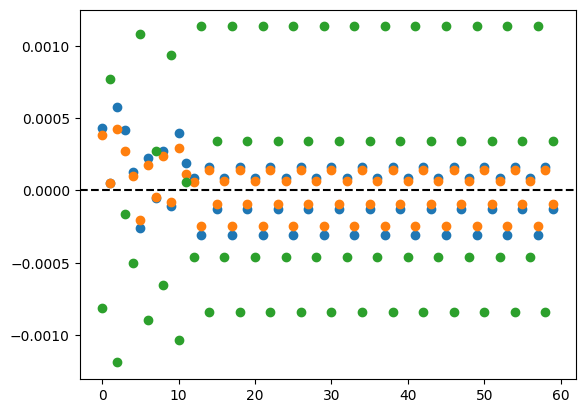

In [215]:
plt.scatter(np.arange(len(residuals_ols[...,0])), residuals_ols[...,0])
plt.scatter(np.arange(len(residuals_ols[...,1])), residuals_ols[...,1])
plt.scatter(np.arange(len(residuals_ols[...,2])), residuals_ols[...,2])
plt.axhline(0, linestyle='--', color="black")

In [228]:
y_hat = X @ theta_hat_wls

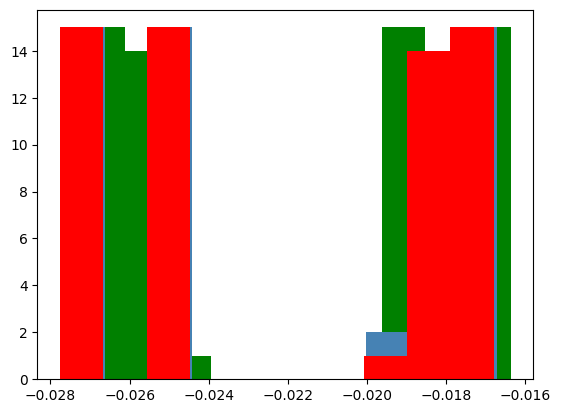

In [230]:
plt.hist(Y[...,0], color="green")
plt.hist(y_hat[...,0], color="steelblue")
plt.hist(y_hat_ols[...,0], color="red")
plt.show()

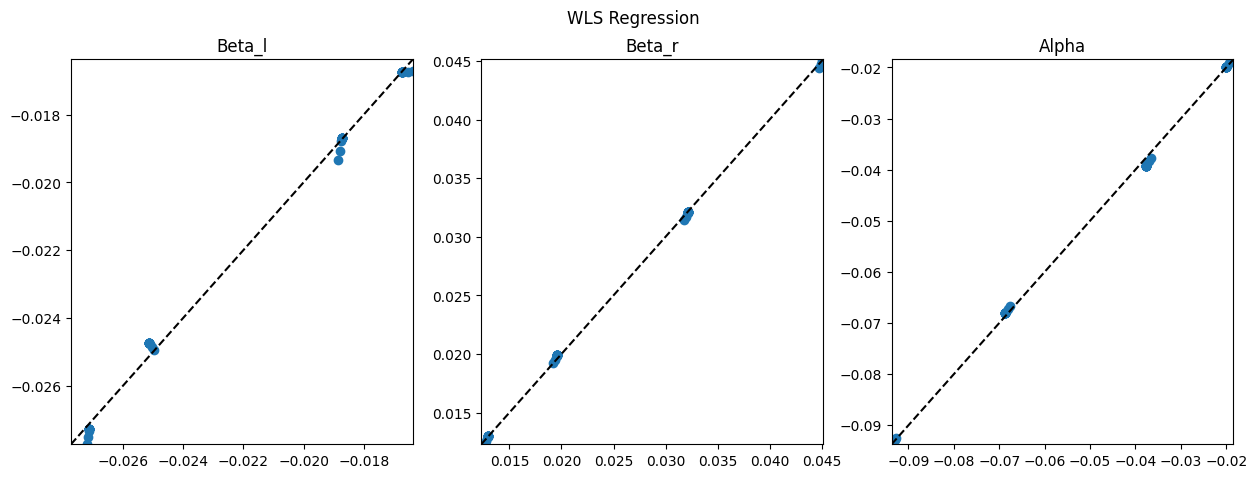

In [248]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("WLS Regression")
# fig.suptitle('Horizontally stacked subplots')
# Beta_l
y_min = min(Y[...,0].min(),y_hat[...,0].min())
y_max = max(Y[...,0].max(),y_hat[...,0].max())
ax[0].set_title("Beta_l")
ax[0].set_xlim(y_min,y_max)
ax[0].set_ylim(y_min,y_max)
ax[0].scatter(Y[...,0],y_hat[...,0])
ax[0].plot([y_min,y_max],[y_min,y_max], "--", color='black')
# Beta_r
y_min = min(Y[...,1].min(),y_hat[...,1].min())
y_max = max(Y[...,1].max(),y_hat[...,1].max())
ax[1].set_title("Beta_r")
ax[1].set_xlim(y_min,y_max)
ax[1].set_ylim(y_min,y_max)
ax[1].scatter(Y[...,1],y_hat[...,1])
ax[1].plot([y_min,y_max],[y_min,y_max], "--", color='black')
# Alpha
y_min = min(Y[...,2].min(),y_hat[...,2].min())
y_max = max(Y[...,2].max(),y_hat[...,2].max())
ax[2].set_title("Alpha")
ax[2].set_xlim(y_min,y_max)
ax[2].set_ylim(y_min,y_max)
ax[2].scatter(Y[...,2],y_hat[...,2])
ax[2].plot([y_min,y_max],[y_min,y_max], "--", color='black')
plt.show()

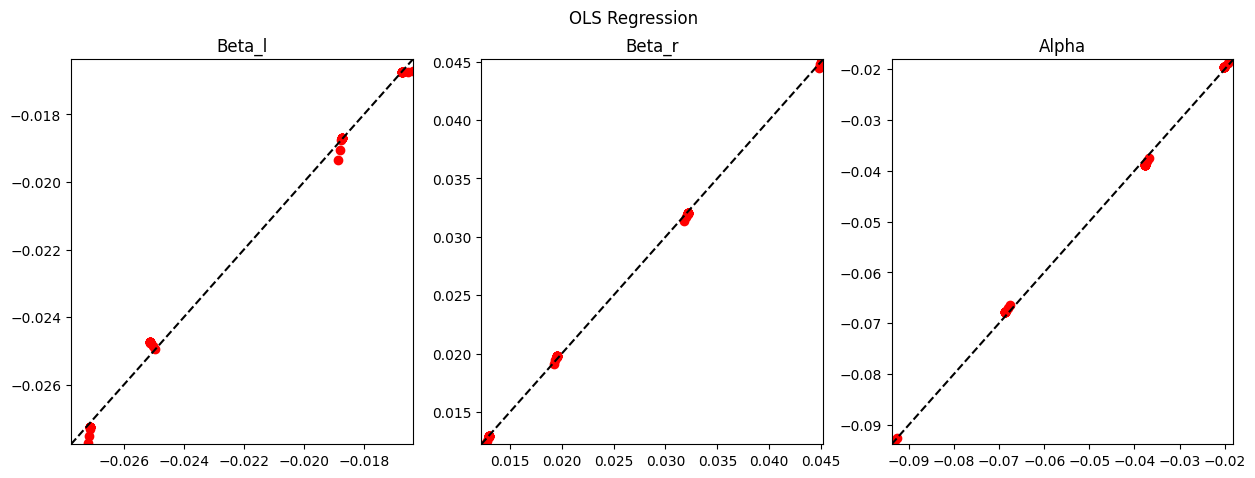

In [249]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("OLS Regression")
# fig.suptitle('Horizontally stacked subplots')
# Beta_l
y_min = min(Y[...,0].min(),y_hat_ols[...,0].min())
y_max = max(Y[...,0].max(),y_hat_ols[...,0].max())
ax[0].set_title("Beta_l")
ax[0].set_xlim(y_min,y_max)
ax[0].set_ylim(y_min,y_max)
ax[0].scatter(Y[...,0],y_hat[...,0], color="red")
ax[0].plot([y_min,y_max],[y_min,y_max], "--", color='black')
# Beta_r
y_min = min(Y[...,1].min(),y_hat_ols[...,1].min())
y_max = max(Y[...,1].max(),y_hat_ols[...,1].max())
ax[1].set_title("Beta_r")
ax[1].set_xlim(y_min,y_max)
ax[1].set_ylim(y_min,y_max)
ax[1].scatter(Y[...,1],y_hat_ols[...,1], color="red")
ax[1].plot([y_min,y_max],[y_min,y_max], "--", color='black')
# Alpha
y_min = min(Y[...,2].min(),y_hat_ols[...,2].min())
y_max = max(Y[...,2].max(),y_hat_ols[...,2].max())
ax[2].set_title("Alpha")
ax[2].set_xlim(y_min,y_max)
ax[2].set_ylim(y_min,y_max)
ax[2].scatter(Y[...,2],y_hat_ols[...,2], color="red")
ax[2].plot([y_min,y_max],[y_min,y_max], "--", color='black')
plt.show()

In [250]:
r2_score(Y, y_hat), r2_score(Y, y_hat_ols)

(0.9987333162868203, 0.9988435259666115)